## Import Packages

In [1]:
import numpy as np
from keras.datasets import imdb
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics


import matplotlib.pyplot as plt
%matplotlib inline

## Loading the Data

In [2]:
# Load the data, keeping only 10,000 of the most frequently occuring words
# (train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

In [6]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load data from CSV file
df = pd.read_csv('imdbData.csv')

# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train_df = df[:train_size]
test_df = df[train_size:]

# Tokenize the text data
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train_df['review'])

# Convert text to sequences of integers
train_sequences = tokenizer.texts_to_sequences(train_df['review'])
test_sequences = tokenizer.texts_to_sequences(test_df['review'])

# Pad the sequences to ensure they all have the same length
maxlen = 100
train_data = pad_sequences(train_sequences, maxlen=maxlen)
test_data = pad_sequences(test_sequences, maxlen=maxlen)

# Get the labels
train_labels = train_df['sentiment'].values
test_labels = test_df['sentiment'].values



In [7]:
# Check the first label
train_labels[0]

'positive'

In [8]:
# Since we restricted ourselves to the top 10000 frequent words, no word index should exceed 10000
# we'll verify this below

# Here is a list of maximum indexes in every review --- we search the maximum index in this list of max indexes
print(type([max(sequence) for sequence in train_data]))

# Find the maximum of all max indexes
max([max(sequence) for sequence in train_data])

<class 'list'>


9999

In [9]:
# Let's quickly decode a review

# step 1: load the dictionary mappings from word to integer index
word_index = imdb.get_word_index()

# step 2: reverse word index to map integer indexes to their respective words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Step 3: decode the review, mapping integer indices to words
#
# indices are off by 3 because 0, 1, and 2 are reserverd indices for "padding", "Start of sequence" and "unknown"
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

decoded_review

"always appearing their this by personality is i involves br felt man br i area that is for this br shows there br happening ? drawn that goofy ? can't skimpy and ? takes study the range hit but from hit for thereby pumbaa frightened are basis or that ? burke genre movie i'll ? we 2 was is had interviewed documentary future burke character finds into disturbing events and story happens the directors sudden so disturbing anyway real goofy film original sort doo was if a bible sorry favourite just film really we to barely was ever instant michael"

In [10]:
len(reverse_word_index)

88584

## Preparing the data

In [11]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))    # Creates an all zero matrix of shape (len(sequences),10K)
    for i,sequence in enumerate(sequences):
        results[i,sequence] = 1                        # Sets specific indices of results[i] to 1s
    return results

# Vectorize training Data
X_train = vectorize_sequences(train_data)

# Vectorize testing Data
X_test = vectorize_sequences(test_data)

In [12]:
X_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [13]:
X_train.shape

(40000, 10000)

### Vectorize labels

In [14]:
# y_train = np.asarray(train_labels).astype('float32')
# y_test  = np.asarray(test_labels).astype('float32')
label_dict = {'positive': 1.0, 'negative': 0.0}
y_train = np.array([label_dict[label] for label in train_labels]).astype('float32')
y_test = np.array([label_dict[label] for label in test_labels]).astype('float32')


## Building the network

### Model defination

In [15]:
model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [17]:
# from tensorflow.keras.utils import plot_model

# plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
# from IPython.display import Image

# Image(filename='model.png')


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 80008     
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 80,089
Trainable params: 80,089
Non-trainable params: 0
_________________________________________________________________


In [19]:
# from ann_visualizer.visualize import ann_viz
# ann_viz(model, view=True, filename="cconstruct_model", title="CNN — Model 1 — Simple Architecture")

## Compiling the model

In [23]:
from tensorflow import keras
from keras import optimizers
# optimizer=keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.01),
    loss = losses.binary_crossentropy,
    metrics = [metrics.binary_accuracy]
)

In [24]:
# Input for Validation
X_val = X_train[:10000]
partial_X_train = X_train[10000:]

# Labels for validation
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Training our model

In [25]:
history = model.fit(
    partial_X_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(X_val, y_val)
)

Epoch 1/20
59/59 [==============================] - 9s 110ms/step - loss: 0.4358 - binary_accuracy: 0.7929 - val_loss: 0.3517 - val_binary_accuracy: 0.8492
Epoch 2/20
59/59 [==============================] - 2s 26ms/step - loss: 0.2816 - binary_accuracy: 0.8820 - val_loss: 0.3276 - val_binary_accuracy: 0.8589
Epoch 3/20
59/59 [==============================] - 1s 25ms/step - loss: 0.2324 - binary_accuracy: 0.9056 - val_loss: 0.3552 - val_binary_accuracy: 0.8522
Epoch 4/20
59/59 [==============================] - 1s 24ms/step - loss: 0.1953 - binary_accuracy: 0.9200 - val_loss: 0.3988 - val_binary_accuracy: 0.8481
Epoch 5/20
59/59 [==============================] - 1s 24ms/step - loss: 0.1608 - binary_accuracy: 0.9353 - val_loss: 0.4519 - val_binary_accuracy: 0.8473
Epoch 6/20
59/59 [==============================] - 1s 25ms/step - loss: 0.1341 - binary_accuracy: 0.9469 - val_loss: 0.5578 - val_binary_accuracy: 0.8285
Epoch 7/20
59/59 [==============================] - 5s 78ms/step - lo

In [26]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

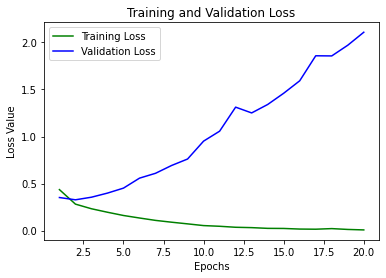

In [27]:
# Plotting losses
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'g', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()

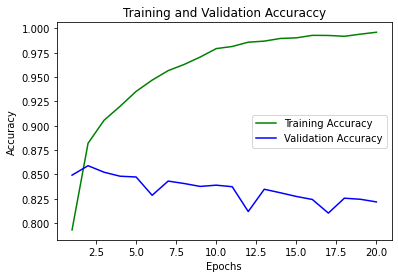

In [28]:
# Training and Validation Accuracy

acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'g', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'b', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Retraining our model

In [29]:
model.fit(
    partial_X_train,
    partial_y_train,
    epochs=3,
    batch_size=512,
    validation_data=(X_val, y_val)
)

Epoch 1/3
59/59 [==============================] - 6s 97ms/step - loss: 0.0165 - binary_accuracy: 0.9935 - val_loss: 2.1935 - val_binary_accuracy: 0.8192
Epoch 2/3
59/59 [==============================] - 1s 24ms/step - loss: 0.0062 - binary_accuracy: 0.9969 - val_loss: 2.2076 - val_binary_accuracy: 0.8210
Epoch 3/3
59/59 [==============================] - 1s 24ms/step - loss: 0.0163 - binary_accuracy: 0.9942 - val_loss: 2.1908 - val_binary_accuracy: 0.8222


## Model Evaluation

In [30]:
# Making Predictions for testing data
np.set_printoptions(suppress=False)
result = model.predict(X_test)

In [31]:
result

array([[2.8074272e-15],
       [2.3509397e-10],
       [9.9999440e-01],
       ...,
       [4.1412266e-11],
       [9.6387923e-01],
       [3.9035082e-04]], dtype=float32)

In [32]:
result_binary = np.round(result).astype(int)

result_binary


array([[0],
       [0],
       [1],
       ...,
       [0],
       [1],
       [0]])

In [33]:
y_pred = np.zeros(len(result))
for i, score in enumerate(result):
    y_pred[i] = np.round(score)

In [34]:
mae = metrics.mean_absolute_error(y_pred, y_test)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=0.1833>